# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [33]:
import pandas as pd
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [34]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image = requests.get(url)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [35]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the index of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [36]:
import json
dict_list = []
with open('tweet-json.txt', 'r', encoding='utf-8') as file:
    for line in file:
        dict_list.append(json.loads(line))

In [37]:
df=pd.DataFrame(dict_list)
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### Quality issues
1. Remove id, geo, coordinates, place, extended_entities, contributors, quoted_status_id\str, in_reply_to_status_id/str, in_reply_to_user_id/str, qutoed_status, retweeted_status and in_reply_to_screen_name columns. These columns either have 0 non-null values or a very small amount. They should be removed.

2. Make display_text_range the largest value and convert it to int. Rename the column to Tweet_Length. The display text range should just be the character length of the tweet, not the text range of the tweet.

3. Convert created_at column from a string to a datetime object.

4. Change all language abbreviatons to the word en. All tweets are in english, so the language abrreviation should be "en".

5. Change source to tweet_source

6. Take rating system from full_text and put in a column called rating. Convert the rating to a string. 

7. Change sources in source column to Twitter for iPhone, Twitter Web Client, Vine, TweetDeck instead of a url. 

8. Convert possibly_sensitive and possibly_sensitive_appealable to a bool. All of the values are False in the column. False is a bool value not a object.

### Tidiness issues
1. Take tweet url from entities and put it in a column name tweet_url.

2. Merge possibly_sensitive and possibly_sensitive_appealable columns

## Cleaning Data

In [39]:
# Make copies of original pieces of data
df_copy = df.copy()

### Issue #1: Remove id, geo, coordinates, place, extended_entities, contributors, quoted_status_id\str, in_reply_to_status_id/str, in_reply_to_user_id/str, qutoed_status, retweeted_status and in_reply_to_screen_name columns.

#### Define: Use drop to remove the columns listed above from the dataset

#### Code

In [40]:
df_copy.drop(columns=['id', 'geo', 'coordinates', 'place', 'extended_entities', 'contributors', 'quoted_status_id',
             'quoted_status_id_str', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
             'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
             'quoted_status', 'retweeted_status'], inplace=True)

#### Test

In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2354 non-null   object
 1   id_str                         2354 non-null   object
 2   full_text                      2354 non-null   object
 3   truncated                      2354 non-null   bool  
 4   display_text_range             2354 non-null   object
 5   entities                       2354 non-null   object
 6   source                         2354 non-null   object
 7   user                           2354 non-null   object
 8   is_quote_status                2354 non-null   bool  
 9   retweet_count                  2354 non-null   int64 
 10  favorite_count                 2354 non-null   int64 
 11  favorited                      2354 non-null   bool  
 12  retweeted                      2354 non-null   bool  
 13  pos

### Issue #2: Make display_text_range the largest value and convert it to int. Rename the column to Tweet_Length.

#### Define: Use a method to extract the second item in the list.  Use rename to change the column name to Tweet_Length. Then convert each value to an int using astype.

#### Code

In [42]:
df_copy['display_text_range'] = df_copy['display_text_range'].apply(lambda row: row[1])

In [43]:
df_copy.rename(columns={'display_text_range': 'Tweet_Length'}, inplace=True)

In [44]:
df_copy['Tweet_Length'] = df_copy['Tweet_Length'].astype(int)

#### Test

In [45]:
df_copy.head()

,created_at,id_str,full_text,truncated,Tweet_Length,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,85,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,False,138,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,121,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,79,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,False,138,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,False,False,en


In [46]:
df_copy.dtypes['Tweet_Length']

dtype('int32')

#### Issue #3: Convert created_at column from a string to a datetime object

#### Define: use datetime to convert each value in the column to a datetime object instead of a string.

#### Code

In [47]:
df_copy['created_at'] = pd.to_datetime(df_copy['created_at'])

#### Test

In [48]:
df_copy.dtypes['created_at']

datetime64[ns, UTC]

#### Issue #4: Change all values in lang column to the word en.

#### Define: Use .loc to replace each rows values with "en".

#### Code

In [49]:
df_copy.loc[:, 'lang'] = 'en'

#### Test

In [50]:
df_copy.lang.value_counts()

en    2354
Name: lang, dtype: int64

#### Issue #5: Change source to tweet_source

#### Define: Use rename to change the column source to tweet_source

#### Code

In [51]:
df_copy.rename(columns={'source' : 'tweet_source'}, inplace=True)

#### Test:

In [52]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id_str                         2354 non-null   object             
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   bool               
 4   Tweet_Length                   2354 non-null   int32              
 5   entities                       2354 non-null   object             
 6   tweet_source                   2354 non-null   object             
 7   user                           2354 non-null   object             
 8   is_quote_status                2354 non-null   bool               
 9   retweet_count                  2354 non-null   int64              
 10  favorite_count          

#### Issue #6: Take rating system from full_text and put in a column called rating.

#### Define: Extract the rating from the full_text string and put in a column called Rating System.

#### Code

In [53]:
df_copy['Rating_System'] = df_copy['full_text'].str.extract('(\d+/\d+)', expand=False)

#### Test

In [54]:
df_copy['Rating_System'].value_counts()

12/10      557
11/10      463
10/10      461
13/10      350
9/10       156
8/10       102
14/10       54
7/10        53
5/10        37
6/10        32
3/10        19
4/10        15
2/10         9
1/10         8
0/10         2
75/10        2
9/11         2
15/10        2
420/10       2
4/20         2
44/40        1
60/50        1
45/50        1
7/11         1
143/130      1
121/110      1
99/90        1
20/16        1
26/10        1
144/120      1
88/80        1
80/80        1
27/10        1
50/50        1
204/170      1
1776/10      1
165/150      1
24/7         1
84/70        1
007/10       1
11/15        1
960/00       1
182/10       1
666/10       1
17/10        1
1/2          1
Name: Rating_System, dtype: int64

#### Issue #7: Change sources in source column to Twitter for iPhone, Twitter Web Client, Vine, TweetDeck instead of a url. 

#### Define: use .map() to change each values to Twitter for iPhone, Twitter Web Client, Vine, TweetDeck

#### Code

In [55]:
df_copy['source'] = df_copy['source'].map({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
                                                                      'Twitter for iPhone','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
                                                                      'Twitter Web Client','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
                                                                      'Vine - Make a Scene','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
                                                                      'TweetDeck'})

KeyError: 'source'

#### Test

In [ ]:
df_copy['source'].value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Issue #8: Convert possibly_sensitive and possibly_sensitive_appealable to a bool.

#### Define: Use astype(bool) to convert possibly_sensitive and possibly_sensitive_appealable from an object to a bool.

#### Code

In [ ]:
df_copy['possibly_sensitive'] = df_copy['possibly_sensitive'].astype(bool)
df_copy['possibly_sensitive_appealable'] = df_copy['possibly_sensitive_appealable'].astype(bool)

#### Test

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id_str                         2354 non-null   object             
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   bool               
 4   Tweet_Length                   2354 non-null   int32              
 5   entities                       2354 non-null   object             
 6   source                         2354 non-null   object             
 7   user                           2354 non-null   object             
 8   is_quote_status                2354 non-null   bool               
 9   retweet_count                  2354 non-null   int64              
 10  favorite_count          

### Cleaning Tidiness Issues

#### Issue #1: Take tweet url from entities and put it in a column name tweet_url.

#### Define: Extract the url next to 'url' and create a column called tweet_url.

#### Code

In [ ]:
df_copy['Tweet_url'] = df_copy['entities'].str['media'].str[0].str['url']


#### Test

In [ ]:
df_copy['Tweet_url'].value_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id_str                         2354 non-null   object             
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   bool               
 4   Tweet_Length                   2354 non-null   int32              
 5   entities                       2354 non-null   object             
 6   tweet_source                   2354 non-null   object             
 7   user                           2354 non-null   object             
 8   is_quote_status                2354 non-null   bool               
 9   retweet_count                  2354 non-null   int64              
 10  favorite_count          

#### Issue #2: Merge possibly_sensitive and possibly_sensitive_appealable columns

#### Define: use | to merge possibly_sensitive and possibly_sensitive_appealable columns. Then delete merged columns.

#### Code

In [56]:
df_copy['Possibly_Sensitive'] = df_copy['possibly_sensitive'] | df_copy['possibly_sensitive_appealable']

In [57]:
df_copy.drop(columns=['possibly_sensitive', 'possibly_sensitive_appealable'], inplace=True)

#### Test

In [58]:
df_copy.head()

,created_at,id_str,full_text,truncated,Tweet_Length,entities,tweet_source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,Rating_System,Possibly_Sensitive
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,85,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en,13/10,False
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,138,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en,13/10,False
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,121,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en,12/10,False
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,79,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en,13/10,False
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,138,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en,12/10,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
df_copy.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [ ]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,Unnamed: 0,created_at,id_str,full_text,truncated,Tweet_Length,entities,tweet_source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,Language,Tweet_url,Rating_System
0,0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,85,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,False,en,https://t.co/MgUWQ76dJU,13/10
1,1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,138,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,False,en,https://t.co/0Xxu71qeIV,13/10
2,2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,121,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,False,en,https://t.co/wUnZnhtVJB,12/10
3,3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,79,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,False,False,en,https://t.co/tD36da7qLQ,13/10
4,4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,138,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",Twitter for iPhone,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,False,False,en,https://t.co/AtUZn91f7f,12/10


### Insights:
1. Rating system compared to retweet count

2. Tweets per Rating

3. Where were the tweets created

#### Insight #1: Rating system compared to retweet count

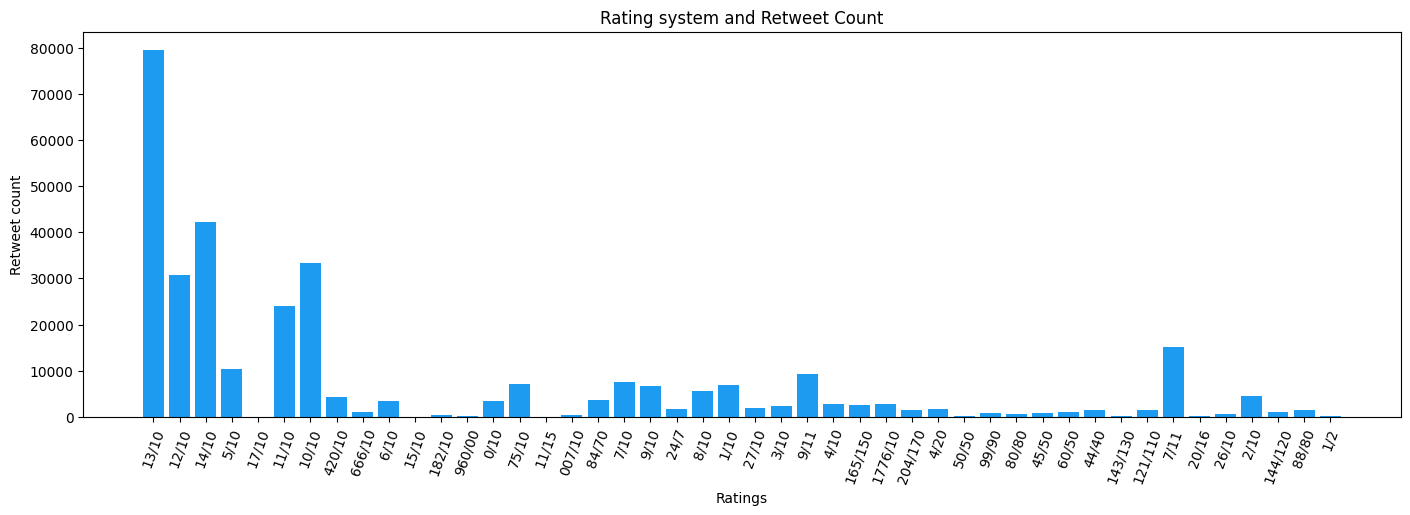

In [ ]:
import matplotlib.pyplot as plt

x = df['Rating_System']
y = df['retweet_count']
plt.figure(figsize=(17,5))
plt.bar(x,y, color='#1D9BF0')
plt.xlabel('Ratings')
plt.xticks(rotation = 70)
plt.ylabel('Retweet count')
plt.title('Rating system and Retweet Count')
plt.show()

#### Insight #2: Tweets per Rating

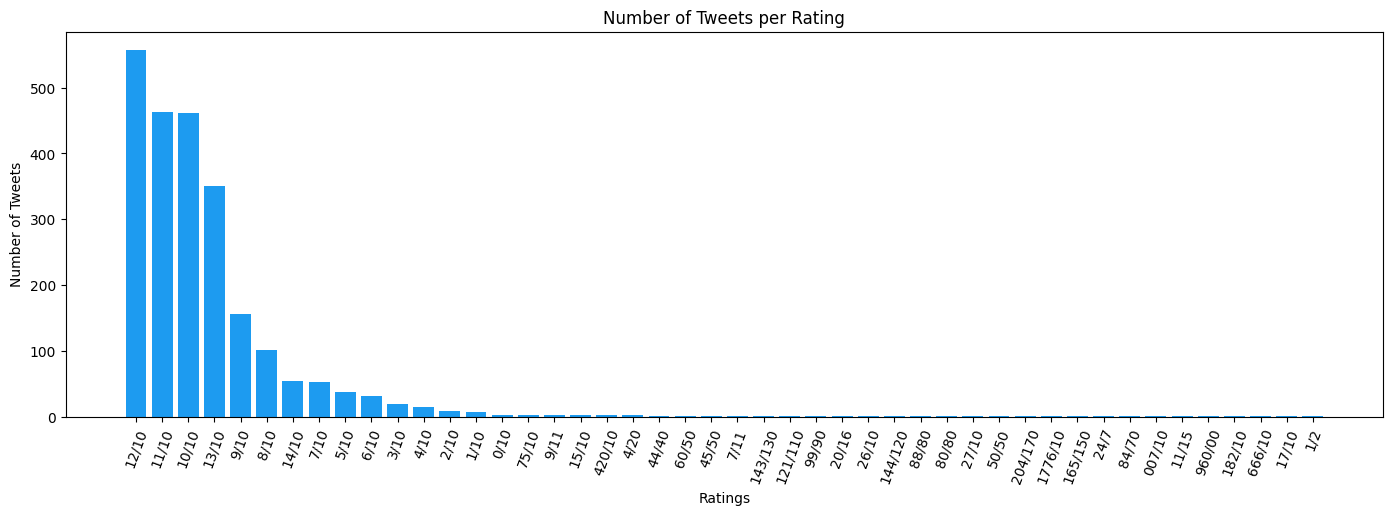

In [ ]:
tweets_per_rating = df['Rating_System'].value_counts()
plt.figure(figsize=(17,5))
plt.bar(tweets_per_rating.index, tweets_per_rating.values, color='#1D9BF0')
plt.xlabel('Ratings')
plt.xticks(rotation = 70)
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Rating')
plt.show()

#### Insight #3: Where were the tweets created

In [ ]:
df.tweet_source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: tweet_source, dtype: int64